In [ ]:
# INFORMATION
"""
Repository: https://github.com/NLBrien/mod550-2025
Creation date: 2025-09-24
Author: Nathan L.Brien
Course: MOD550 - Machine Learning
Title: Assignment 1 (task 1), number 3 to 5
Description: visualize selected data distribution from project dataset
    Task 3: make a histogram for the source data you selected
        (I wrongly assumed it was the data selected from the project
        see related code for data management:
            MOD550-P1-NLB-crisis_phase_isolation
            MOD550-P1-NLB-phase_p_year
        )
    Task 4: convert the histogram into a discrete PMF
    Task 5: calculate the cumulative for each feature

Last modification date: 2025-09-24
"""

'\nRepository: https://github.com/NLBrien/mod550-2025\nCreation date: 2025-09-24\nAuthor: Nathan L.Brien\nCourse: MOD550 - Machine Learning\nTitle: Assignment 1 (task 1), number 3 to 5\nDescription: visualize selected data distribution from project dataset\n    Task 3: make a histogram for the source data you selected\n    Task 4: convert the histogram into a discrete PMF\n    Task 5: calculate the cumulative for each feature\n\nLast modification date: 2025-09-24\n'

In [ ]:
# LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# DATA POOL DESCRIPTION
"""
Call the "description" function from Pandas to compute data description such as:
mean, standard, minimum, maximum, quartiles
"""
## Dataset import
grfc_phase_3d_points = pd.read_csv(
    r"C:\Users\natha\UiS - MOD550\mod550-2025\MOD550-NLB-TASK_1\grfc_phase_3d_points.csv"
)

### Preview first rows of dataset (5 rows default)
print(grfc_phase_3d_points.head())

# Print dataset description (exclude index column)
print(grfc_phase_3d_points[["Year", "Phase", "Count"]].describe())


   Unnamed: 0  Year  Phase  Count
0           0  2016      1      0
1           1  2016      2     22
2           2  2016      3     11
3           3  2016      4     13
4           4  2016      5      2
              Year      Phase    Count
count    50.000000  50.000000  50.0000
mean   2020.500000   3.000000  10.5800
std       2.901442   1.428571  11.4198
min    2016.000000   1.000000   0.0000
25%    2018.000000   2.000000   2.0000
50%    2020.500000   3.000000   5.0000
75%    2023.000000   4.000000  17.0000
max    2025.000000   5.000000  38.0000


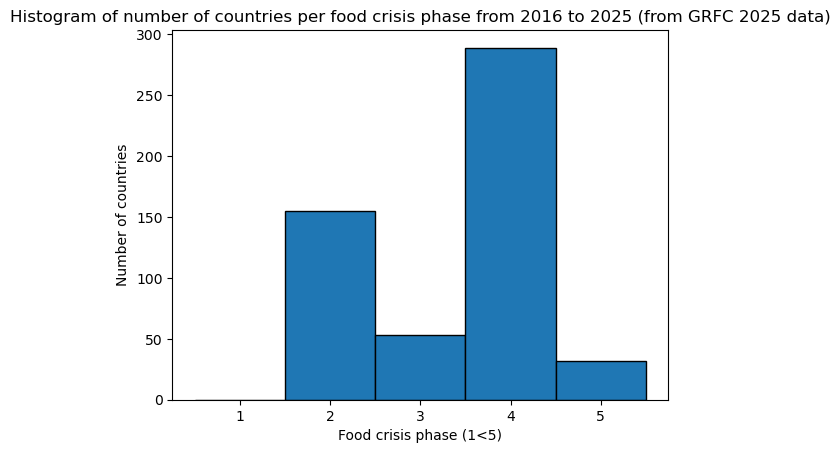

In [ ]:
# HISTOGRAM (T1.3)
"""
Define values and functions for histogram plotting
Reference for histogram functions and arguments:
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
No need to separate values into lists since data can directly be used from dataframe
"""
## Plot histogram
### HISTOGRAM 1 - number of country in food crisis status between 2016 to 2025
plt.hist(
    # x-axis = phases column data (food crisis phase/category/level)
    grfc_phase_3d_points["Phase"],
    # number of bins = 6 (for phases 1 to 5), shifted arange function so bins are centered on x value
    bins=np.arange(0.5, 6.5, 1),
    # weight of y axis = count (total countries per phase per year)
    weights=grfc_phase_3d_points["Count"],
    edgecolor="black",
)
plt.xlabel("Food crisis phase (1<5)")
plt.ylabel("Number of countries")
plt.title("Histogram of number of countries per food crisis phase from 2016 to 2025 (2025 GRFC data)")
plt.show()


   Year  Phase  Count       PMF
0  2016      1      0  0.000000
1  2016      2     22  0.041588
2  2016      3     11  0.020794
3  2016      4     13  0.024575
4  2016      5      2  0.003781
Phase
1    0.000000
2    0.293006
3    0.100189
4    0.546314
5    0.060491
Name: Count, dtype: float64


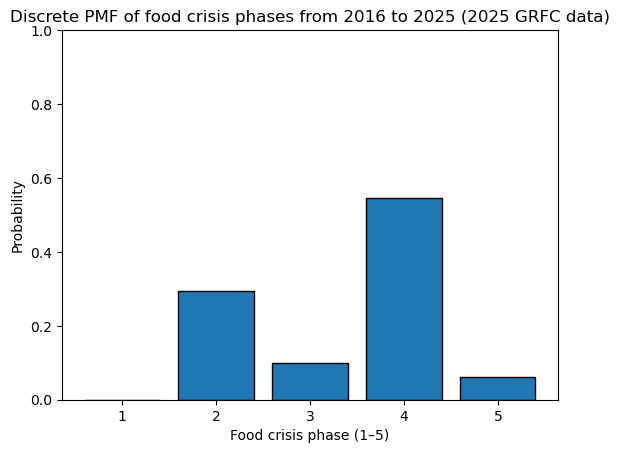

In [69]:
# PROBABILITY HISTOGRAM - DISCRETE PMF (T1.4)
"""
Define values and functions for heaetmap plotting
Reference 1: https://www.datacamp.com/tutorial/probability-mass-function
Reference 2: https://www.geeksforgeeks.org/pandas/bar-plot-in-matplotlib/
Need to sum total instances in order to compute discrete probability
Create new dataset with new computed PMF data
Plot new dataset
"""
## Calculate total distribution
sample_total = grfc_phase_3d_points["Count"].sum()

## Add a PMF column and compute for each row (PMF is count / total number of samples)
grfc_phase_3d_points["PMF"] = grfc_phase_3d_points["Count"] / sample_total
### Preview first rows of modified dataset without index (5 rows default)
print(grfc_phase_3d_points[["Year", "Phase", "Count", "PMF"]].head())

## Discrete PMF plot
### Create series with counts sum for each phase regardless of year
phase_3d_pmf = grfc_phase_3d_points.groupby("Phase")["Count"].sum()
### Normalize PMF of counts sum (probabilities equals 1)
phase_3d_pmf = phase_3d_pmf / phase_3d_pmf.sum()
### Preview first rows of series (5 rows default)
print(phase_3d_pmf.head())

## Plot histogram (use of plt.bar instead of plt.hist)
### Use new dataset phase_3d_pmf with added pmf sum
plt.bar(phase_3d_pmf.index, phase_3d_pmf.values, edgecolor="black")
plt.xlabel("Food crisis phase (1–5)")
plt.ylim(0, 1)
plt.ylabel("Probability")
plt.title("Discrete PMF of food crisis phases from 2016 to 2025 (2025 GRFC data)")
plt.show()


c:\Users\natha\anaconda3\Lib\site-packages\numpy\lib\_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


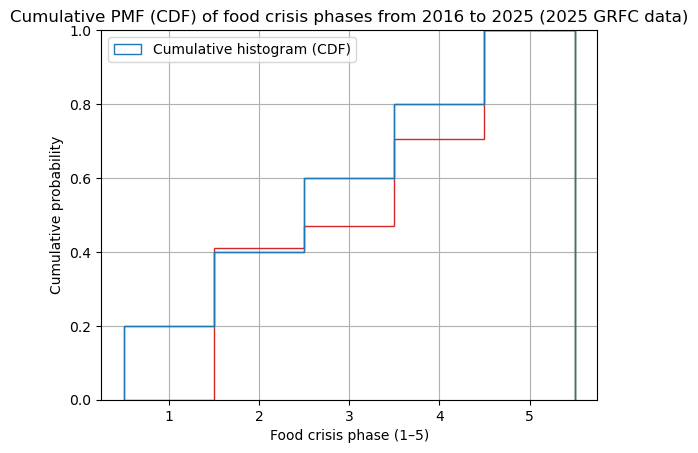

In [70]:
# CUMULATIVE HISTOGRAM - CMF (T1.5)
"""
Define values and functions for heaetmap plotting
Reference : https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html
"""
# Plot cumulative histogram
n, bins, patches = plt.hist(
    grfc_phase_3d_points,
    bins=np.arange(0.5, 6.5, 1),   # bins centered on phases 1–5
    density=True,                  # normalize to probabilities
    histtype="step",
    cumulative=True,
    label="Cumulative histogram (CDF)"
)

# Labels and formatting
plt.xlabel("Food crisis phase (1–5)")
plt.ylim(0, 1)
plt.ylabel("Cumulative probability")
plt.title("Cumulative PMF (CDF) of food crisis phases from 2016 to 2025 (2025 GRFC data)")
plt.grid(True)
plt.legend()
plt.show()
